In [1]:
import pandas as pd
import numpy as np

In [2]:
# read iris dataset
iris = pd.read_csv(r"C:\Users\acreddy\Desktop\abc\LogisticReg-PimaDiabetes\data\iris.csv")

In [3]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
# this dataset is very balanced across all three classes
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
# check the null values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# get data insights and visualize distributions
from ydata_profiling import ProfileReport

profile = ProfileReport(iris)

In [8]:
# save the reports
profile.to_file("iris.html")
profile.to_file("iris.json")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
# split target and independent variables
X= iris.drop("species", axis=1)
y= iris["species"]

In [62]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [63]:
y[:2]

0    setosa
1    setosa
Name: species, dtype: object

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# split the data in to train and test datasets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

In [66]:
X_train.shape,   y_train.shape

((112, 4), (112,))

In [67]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [68]:
# lets encode the labels. Here i am using label encoding.
from sklearn.preprocessing import LabelEncoder

In [69]:
# intializing the label encoder
encoder= LabelEncoder()

In [70]:
# fit and transform on train data
y_train_encoded= encoder.fit_transform(y_train)

In [71]:
# transform on test data to avoid data leakage
y_test_encoded= encoder.transform(y_test)

In [72]:
# to know which class assigned to which label
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [73]:
label_mapping

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

# LogisticRegression (with sklearn  OneVsRestClassifier)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [21]:
# here i am using sklearn OVR technique. We can use "mutlinomial" as well without sklean OneVsRestClassifier. We will see it below:
log_reg = OneVsRestClassifier(LogisticRegression())

In [22]:
# fit the model on train data
log_reg.fit(X_train, y_train_encoded)

OneVsRestClassifier(estimator=LogisticRegression())

In [23]:
# evaluate the model on test data
y_pred= log_reg.predict(X_test)

In [24]:
# get the probability values of y_pred
y_pred_proba= log_reg.predict_proba(X_test)

In [25]:
# just printing the 5 values 
y_pred_proba[:5]

array([[6.29402017e-03, 7.22781092e-01, 2.70924888e-01],
       [9.33376262e-01, 6.66158540e-02, 7.88355220e-06],
       [3.85506680e-06, 3.82063840e-01, 6.17932305e-01],
       [1.03209230e-02, 6.45275616e-01, 3.44403461e-01],
       [3.11483782e-03, 6.30080967e-01, 3.66804196e-01]])

In [26]:
# class 0 probability values
y_pred_proba[:,0]

array([6.29402017e-03, 9.33376262e-01, 3.85506680e-06, 1.03209230e-02,
       3.11483782e-03, 8.84100429e-01, 1.44296143e-01, 6.74545451e-04,
       3.19354937e-03, 4.93619796e-02, 1.21536052e-03, 7.54489280e-01,
       8.97866069e-01, 7.75033349e-01, 9.35734066e-01, 9.12227731e-03,
       1.34400822e-04, 3.98911842e-02, 1.14298154e-02, 1.74211806e-04,
       8.01616495e-01, 2.34703146e-03, 8.73144530e-01, 1.88788948e-04,
       5.82162876e-05, 4.90840144e-04, 9.29750728e-05, 1.11849309e-04,
       7.78121759e-01, 7.76789625e-01, 9.16788807e-01, 9.83305636e-01,
       1.91725694e-02, 8.51651178e-01, 8.18706551e-01, 7.23224446e-04,
       1.65493101e-02, 8.83846030e-01])

In [27]:
# class 1 probability values
y_pred_proba[:,1]

array([0.72278109, 0.06661585, 0.38206384, 0.64527562, 0.63008097,
       0.11589237, 0.81407163, 0.19071742, 0.73431857, 0.89199392,
       0.22845372, 0.24550688, 0.10213139, 0.22496188, 0.06426036,
       0.41972822, 0.25790108, 0.91396332, 0.7364629 , 0.30204913,
       0.19837534, 0.36276554, 0.12684463, 0.31628767, 0.10485605,
       0.21829978, 0.41722916, 0.19335413, 0.22187227, 0.22320231,
       0.0832097 , 0.01669013, 0.71992608, 0.1483413 , 0.18128943,
       0.4382087 , 0.58894362, 0.11614911])

In [28]:
# class 2 probability values
y_pred_proba[:,2]

array([2.70924888e-01, 7.88355220e-06, 6.17932305e-01, 3.44403461e-01,
       3.66804196e-01, 7.20267378e-06, 4.16322248e-02, 8.08608032e-01,
       2.62487881e-01, 5.86440962e-02, 7.70330922e-01, 3.84035805e-06,
       2.54144494e-06, 4.77377912e-06, 5.57864238e-06, 5.71149507e-01,
       7.41964518e-01, 4.61454956e-02, 2.52107283e-01, 6.97776658e-01,
       8.16212660e-06, 6.34887428e-01, 1.08436645e-05, 6.83523543e-01,
       8.95085734e-01, 7.81209375e-01, 5.82677864e-01, 8.06534019e-01,
       5.96828867e-06, 8.06141529e-06, 1.49187585e-06, 4.23441432e-06,
       2.60901347e-01, 7.51968086e-06, 4.02194638e-06, 5.61068071e-01,
       3.94507074e-01, 4.85639677e-06])

In [29]:
# lets see the metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
classification_report = classification_report(y_test_encoded, y_pred)

In [30]:
accuracy

0.9736842105263158

In [31]:
conf_matrix

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [32]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [33]:
# check how many classes we have in target(y)
n_classes = len(np.unique(y))
n_classes

3

In [34]:
# lets caluclate fpr, tpr, no need threshold and we can use roc_auc_score instead of auc also.
# fpr = dict()
# tpr = dict()
# auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_pred_proba[:, i])
#     auc[i] = roc_auc_score(y_test_encoded == i, y_pred_proba[:, i])

In [40]:
# lets calculate fpr, tpr( note thresholds is not required for ROC and AUC so i left with empty "_") i used here "auc"
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

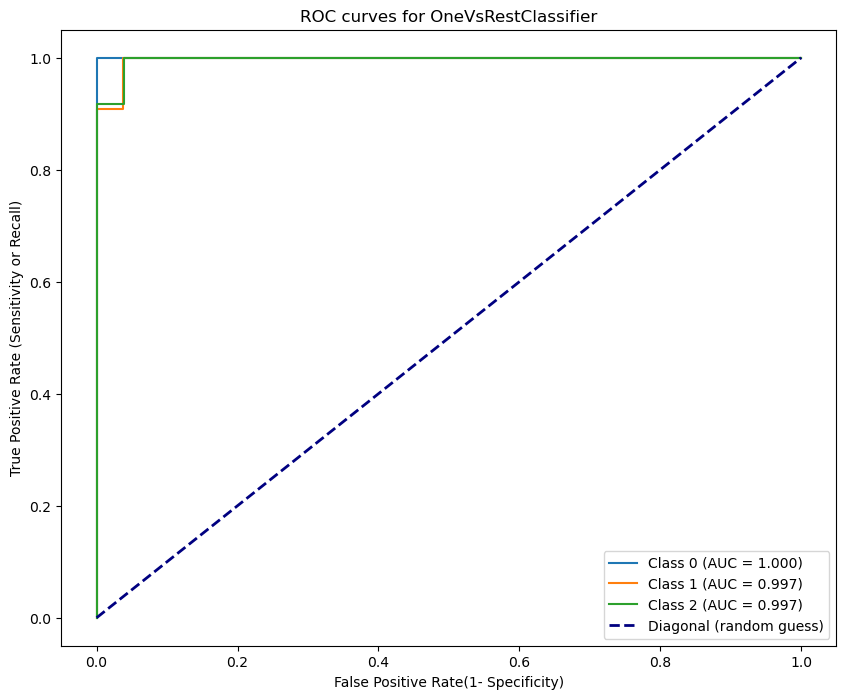

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Diagonal (random guess)')
plt.xlabel('False Positive Rate(1- Specificity)')
plt.ylabel('True Positive Rate (Sensitivity or Recall)')
plt.title('ROC curves for OneVsRestClassifier')
plt.legend()
plt.show()


In [41]:
# Access individual class models and their coefficients
individual_models = log_reg.estimators_
for i, model in enumerate(individual_models):
    print(f"Class {i} coefficients:", model.coef_)
    print(f"Class {i} intercepts:", model.intercept_)

Class 0 coefficients: [[-0.41383227  0.86729914 -2.18545449 -0.90512945]]
Class 0 intercepts: [6.10653373]
Class 1 coefficients: [[-0.15340831 -2.09474422  0.54591448 -0.9762508 ]]
Class 1 intercepts: [5.58403512]
Class 2 coefficients: [[-0.36646368 -0.50647123  2.7284644   2.02322682]]
Class 2 intercepts: [-12.95967444]


# Precision-Recall Curve

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [43]:
n_classes = len(np.unique(y))

In [44]:
precision = dict()
recall = dict()
avg_precision = dict() # this is nothing but Auc under precision-recall curve

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_encoded==i, y_pred_proba[:,i])
    avg_precision[i] = average_precision_score(y_test_encoded==i, y_pred_proba[:,i])

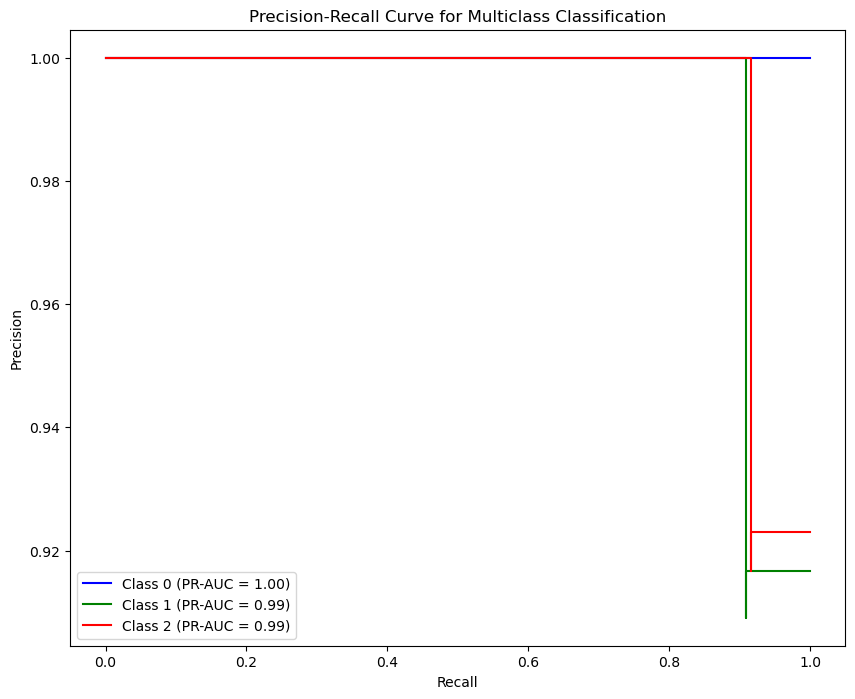

In [45]:
plt.figure(figsize=(10, 8))
colors= ["b", "g", "r"]
for i in range(n_classes):
    # generally we go with plt.step than plt.plot in precision-recall plot as they change very frquent 
    plt.step(recall[i], precision[i], where="post", color= colors[i], label=f"Class {i} (PR-AUC = {avg_precision[i]:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend()
plt.show()

# LogisticRegression (without sklearn  OneVsRestClassifier)

In [75]:
model= LogisticRegression(multi_class= "multinomial", max_iter=500) 
# you can chose multi_class= "auto", it applies ovr (OneVsRest) approach by default for multiclass or binary also.
# this multi_class= "multinomial" explicitly we are telling the model its multi-class classification.

In [76]:
model.fit(X_train, y_train_encoded)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [77]:
y_pred_multinom = model.predict(X_test)

In [78]:
y_pred_multinom

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [79]:
y_pred_multinom_proba= model.predict_proba(X_test)

In [80]:
y_pred_multinom_proba[:5]

array([[3.98024376e-03, 8.22154307e-01, 1.73865449e-01],
       [9.44154242e-01, 5.58454481e-02, 3.09782339e-07],
       [1.20557728e-08, 1.82711496e-03, 9.98172873e-01],
       [6.67491350e-03, 7.87151670e-01, 2.06173416e-01],
       [1.54025037e-03, 7.69771818e-01, 2.28687931e-01]])

In [81]:
y_pred_multinom_proba[:,0]

array([3.98024376e-03, 9.44154242e-01, 1.20557728e-08, 6.67491350e-03,
       1.54025037e-03, 9.52631343e-01, 7.75085563e-02, 1.77723473e-04,
       2.32895054e-03, 2.86983330e-02, 4.69565018e-04, 9.65419265e-01,
       9.70924280e-01, 9.58971756e-01, 9.77780705e-01, 4.72385454e-03,
       8.50821680e-06, 2.75652801e-02, 8.51266587e-03, 1.68519712e-05,
       9.61421335e-01, 1.39178681e-03, 9.58715883e-01, 2.18383274e-05,
       1.80392749e-06, 1.04802456e-04, 1.05842288e-05, 5.01250145e-06,
       9.63720112e-01, 9.52752033e-01, 9.93733021e-01, 9.81357652e-01,
       6.68495111e-03, 9.66837417e-01, 9.83973759e-01, 3.45550906e-04,
       7.18360008e-03, 9.66158658e-01])

In [82]:
y_pred_multinom_proba[:,2]

array([1.73865449e-01, 3.09782339e-07, 9.98172873e-01, 2.06173416e-01,
       2.28687931e-01, 2.61899756e-07, 1.54692765e-02, 8.41343364e-01,
       2.22210615e-01, 2.71343545e-02, 7.58674629e-01, 1.13101775e-07,
       5.17373592e-08, 1.61448118e-07, 1.02268925e-07, 2.98832179e-01,
       9.74185162e-01, 2.55558762e-02, 1.64211668e-01, 9.60825030e-01,
       2.80201615e-07, 6.00024061e-01, 3.83874698e-07, 9.50479604e-01,
       9.75925324e-01, 8.90576658e-01, 9.35808920e-01, 9.80328336e-01,
       1.93751344e-07, 3.32798021e-07, 8.17740463e-09, 6.34442948e-08,
       8.66419255e-02, 2.13322448e-07, 6.10381728e-08, 7.22812088e-01,
       1.56734159e-01, 1.25584577e-07])

In [83]:
accuracy_multinom = accuracy_score(y_test_encoded, y_pred_multinom)
conf_matrix_multinom = confusion_matrix(y_test_encoded, y_pred_multinom)
classification_report_multinom = classification_report(y_test_encoded, y_pred_multinom)

In [84]:
accuracy_multinom

1.0

In [85]:
conf_matrix_multinom

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [86]:
print(classification_report_multinom)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [87]:
# since multinomial log-regression dont have attibute "model.estimators_" only OVR log-reg has it. so:
coefficients= model.coef_
intercepts= model.intercept_

In [88]:
# (Optional) Access individual class models and their coefficients
for i, (coef, intercept) in enumerate(zip(coefficients, intercepts)):
    print(f"Coefficients for Class {i + 1}: {coef}")
    print(f"Intercept for Class {i + 1}: {intercept}")

Coefficients for Class 1: [-0.38943311  0.92007673 -2.33151291 -0.98295901]
Intercept for Class 1: 8.901147377566717
Coefficients for Class 2: [ 0.49937713 -0.3087982  -0.21480653 -0.73432747]
Intercept for Class 2: 2.003961908018455
Coefficients for Class 3: [-0.10994402 -0.61127853  2.54631943  1.71728647]
Intercept for Class 3: -10.905109285585047


# lets plot ROC curve

In [89]:
# here i used roc_auc_score which takes y_test & y_proba rather auc which takes FPR & TPR 
multinom_fpr = dict()
multinom_tpr = dict()
multinom_auc = dict()
for i in range(n_classes):
    multinom_fpr[i], multinom_tpr[i], _ = roc_curve(y_test_encoded == i, y_pred_multinom_proba[:, i])
    multinom_auc[i] = roc_auc_score(y_test_encoded == i, y_pred_multinom_proba[:, i])

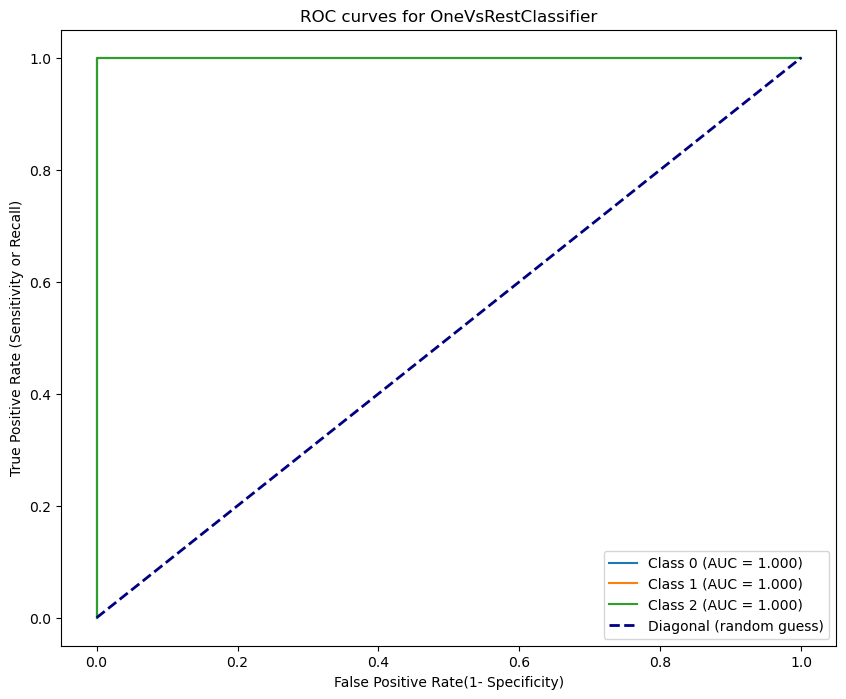

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(multinom_fpr[i], multinom_tpr[i], label=f"Class {i} (AUC = {multinom_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Diagonal (random guess)')
plt.xlabel('False Positive Rate(1- Specificity)')
plt.ylabel('True Positive Rate (Sensitivity or Recall)')
plt.title('ROC curves for OneVsRestClassifier')
plt.legend()
plt.show()
